# Ataques a redes

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import sys
import queue
print ("- Diseñado en python 3")
print ("- No testeado para python 2")
print ("- Kernel en ejecución: \npython " + sys.version)

- Diseñado en python 3
- No testeado para python 2
- Kernel en ejecución: 
python 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


## Funciones de otras practicas importadas como una librería

In [2]:
import lib_grafos as lg
file = open('funciones_lib_grafos.txt', 'r')
print(file.read())

def grafo_aleatorio(num_nodos, prob):
def tam_grafo(grafo):
def aleatorio(num_nodos, prob):
def indiceCluster_caminoCar(grafo):
def aleatiorio2(num_nodos, prob):
def calcula_C(grafo):
def calcula_L(grafo):
def calcula_grados(grafo):
def adyacentes(grafo, vertice):
def matrix_to_adyacent(grafo):
def calcula_grados_rapido(grafo, limit):
def get_distro(grados, tam_grafo):
def busqueda_anchura(grafo, nodo_ini=0):
def componentes_conexas(grafo):
def componentes_conexas_nodo(grafo, nodo, cola):
def aleatorio3(N, p):
def create_mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno_print (num_nodos, k, probabilidad):
def libre_escala (num_inicial, num_final, num_ramas):
def libre_escala_print (num_inicial, num_final, num_ramas, l=True):


## Crear red libre de escala y atacarla aleatoriamente

In [23]:
def ataque_aleatorio (num_inicial, num_final, num_ramas, num_nodos):
    grafo = lg.libre_escala (num_inicial, num_final, num_ramas)
    #print("Grafo realizado, pasando al ataque")
    for i in range(num_nodos):
        nodo = rd.randrange(num_final)
        for j in range(num_final):
            grafo[nodo][j]=0
            grafo[j][nodo]=0
            
    #print("Ataque realizado, pasando a la busqueda")
            
    distancias, padres = lg.busqueda_anchura(grafo, int(num_final/2))
    counter=-1 #El nodo padre siempre esta desconectado, le restamos
    for elem in padres:
        if elem==None:
            counter+=1
    #print("Nodos desconectados = " + str(counter))
    return counter

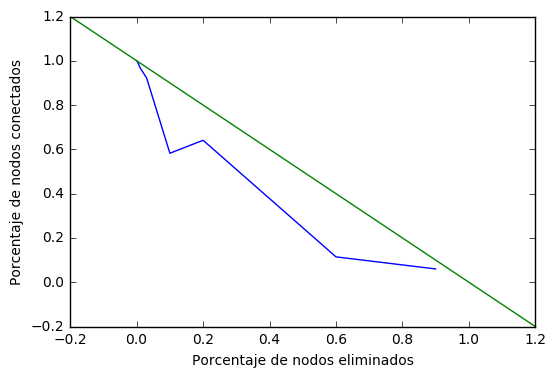

In [15]:
num_nodos=[0, 1, 5, 15, 50, 100, 300, 450]
c=[]
n=500
for num in num_nodos:
    a=0
    for i in range(4):
        #print("====== "+str(num))
        a += ataque_aleatorio (10, n, 1, num)
    c.append(n - a/4)
for i in range(len(num_nodos)):
    c[i]=c[i]/n
    num_nodos[i]=num_nodos[i]/n
plt.plot(num_nodos, c)
plt.plot([-0.2, 1.2], [1.2, -0.2])
plt.xlabel('Porcentaje de nodos eliminados')
plt.ylabel('Porcentaje de nodos conectados')
plt.show()

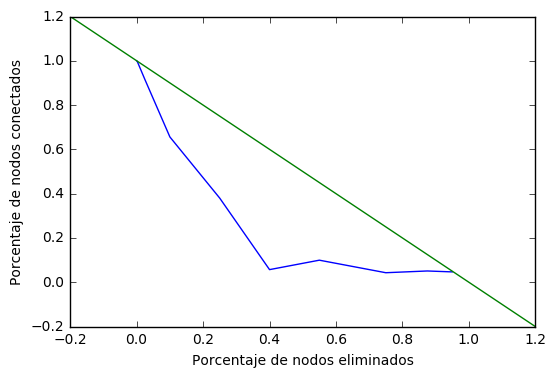

In [16]:
num_nodos=[0, 5, 50, 200, 500, 800, 1100, 1500, 1750, 1900]
c=[]
n=2000
for num in num_nodos:
    a=0
    for i in range(4):
        #print("====== "+str(num))
        a += ataque_aleatorio (10, n, 1, num)
    c.append(n - a/4)
for i in range(len(num_nodos)):
    c[i]=c[i]/n
    num_nodos[i]=num_nodos[i]/n
plt.plot(num_nodos, c)
plt.plot([-0.2, 1.2], [1.2, -0.2])
plt.xlabel('Porcentaje de nodos eliminados')
plt.ylabel('Porcentaje de nodos conectados')
plt.show()

## Crear red libre de escala y atacarla de acuerdo a los grados

In [5]:
def ataque_grado (num_inicial, num_final, num_ramas, num_nodos):
    grafo = lg.libre_escala (num_inicial, num_final, num_ramas)
    #print("Grafo realizado, pasando al ataque")
    for i in range(num_nodos):
        grados = lg.calcula_grados_rapido(grafo, num_final)
        maxa=-1
        index=-1
        for j in range(num_nodos):
            if maxa<grados[j]:
                maxa=grados[j]
                index=j
        for j in range(num_final):
            grafo[index][j]=0
            grafo[j][index]=0
    
    #print("Ataque realizado, pasando a la busqueda")
    
    distancias, padres = lg.busqueda_anchura(grafo, int(num_final/2))
    counter=-1 #El nodo padre siempre esta desconectado, le restamos
    for elem in padres:
        if elem==None:
            counter+=1
    #print("Nodos desconectados = " + str(counter))
    return counter

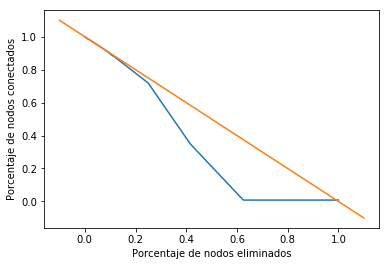

In [12]:
num_nodos=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 30, 50, 75, 100, 120]
c=[]
n=120
for num in num_nodos:
    a=0
    #print(str(num)+"/"+str(n))
    for i in range(4):
        #print("====== "+str(num))
        a += ataque_grado (10, n, 4, num)
    c.append(n - a/4)
for i in range(len(num_nodos)):
    c[i]=c[i]/n
    num_nodos[i]=num_nodos[i]/n
plt.plot(num_nodos, c)
plt.plot([-0.1, 1.1], [1.1, -0.1])
plt.xlabel('Porcentaje de nodos eliminados')
plt.ylabel('Porcentaje de nodos conectados')
plt.show()

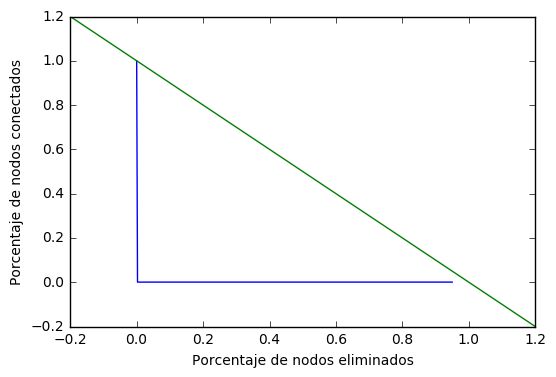

In [17]:
num_nodos=[0, 5, 50, 200, 500, 800, 1100, 1500, 1750, 1900]
c=[]
n=2000
for num in num_nodos:
    a=0
    for i in range(4):
        #print("====== "+str(num))
        a += ataque_grado (10, n, 1, num)
    c.append(n - a/4)
for i in range(len(num_nodos)):
    c[i]=c[i]/n
    num_nodos[i]=num_nodos[i]/n
plt.plot(num_nodos, c)
plt.plot([-0.2, 1.2], [1.2, -0.2])
plt.xlabel('Porcentaje de nodos eliminados')
plt.ylabel('Porcentaje de nodos conectados')
plt.show()

## Comparación de los resultados obtenidos

El ataque aleatorio es un tipo de ataque que las redes libres de escala aguantan muy bien. El ataque aleatorio obtiene unos resultados que se mueven de manera paralela al caso mejor (resistencia/coste=1) y dependiendo de la densidad de ramas se aproxima más o menos.

En cambio el ataque dirigido a los nodos con mayor grado deja enseguida al nodo medido aislado de la mayor parte de la red, sobre todo si el parámetro m de la red libre de escala es un valor pequeño.
Si aumentamos el valor de m el desplone puede retrasarse a un porcentaje mayor.